In [ ]:
 # 02. Neural Network classification with PyTorch

In [ ]:
## Making classification data and get it ready

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
print(f"First 5 samples of X: \n{X[:5]}")
print(f"\nFirst 5 samples of y: {y[:5]}")

First 5 samples of X: 
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 samples of y: [1 1 1 1 0]


In [ ]:
# Making DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


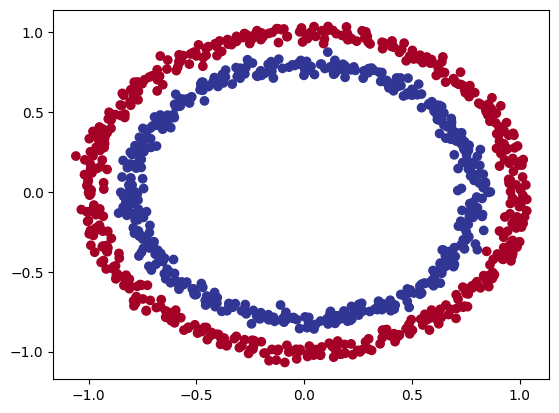

In [ ]:
# Visulaize, visualize, visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y, # c is array or list of colors
            cmap=plt.cm.RdYlBu);

Note : The data we're working is often referred to as a toy dataset, a datset that is small enough to experiment but still sizeable enough to practice the fundamentals

## 1.1 Check input and output shapes


In [ ]:
# View the first examples of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same or y: {y_sample.shape}" )

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same or y: ()


In [ ]:
### 1.2 Turn data into tensors and create train and test splits
import torch
torch.__version__

'2.5.1+cu121'

In [ ]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [ ]:
# Turn the data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [ ]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 0.2 is 20 percent of test data and remaining 80 percent is training data
                                                    random_state=42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

Let's build a model to classify our blue and red dots.

To do so, we want to:

1. Setup device agnostic code so our code will run on GPU if there is one
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop


In [ ]:
# Import PyTorch and nn
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

### Now we've setup device agnostic code, let's create a model that:

1. Subclasses `nn.module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Define a `forward()` method that outlines the forward pass (or forward computation) of the model
4. Instantiate an instance of our model and send it to the target `device`

In [ ]:
from sklearn import datasets

 # 1. COnstruct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()

        # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 feature
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 featues from previous layer and output a single feature (same as y)

    # 3. Define a forward() method that outlines the forward pass
    def forward(self, x):
        return self.layer_2(self.layer_1(x)) # x-> layer_1 (x is goes into layer_1) -> layer_2 (the output of layer_1 goes into layer_2 ) -> output


# 4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
device

'cpu'

In [ ]:
# To check on which device our parameters reside
next(model_0.parameters()).device

device(type='cpu')

In [ ]:
# Let's replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.1135, -0.2659],
                      [-0.6375, -0.0150],
                      [-0.5539,  0.3872],
                      [ 0.4385,  0.6047],
                      [-0.4751,  0.2356]])),
             ('0.bias', tensor([ 0.5552, -0.5094, -0.6123,  0.3516, -0.6349])),
             ('1.weight',
              tensor([[2.9587e-01, 7.5832e-02, 3.1557e-01, 1.9640e-04, 2.0685e-01]])),
             ('1.bias', tensor([-0.0556]))])

In [ ]:
# Make Predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))

print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Lenght of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predicitions:\n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels: {y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Lenght of test samples: 200, Shape: torch.Size([200, 2])

First 10 predicitions:
tensor([[-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-1.],
        [-0.],
        [-0.]])

First 10 labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

## 2.1 Setup a loss function and optimizer

Which loss function or optimizer should you use?

for regression you might want MAE or MSE (mean absolute or mean squared error)

for classification you might want binary cross entropy or categorical cross entropy (cross entropy).

And for **optimizers**, two of the most common and useful are SGD and Adam, PyTorch has many build-in

for **loss** function we're going to use `torch.nnBCEWithLogitsLoss()`

**logits**:  refer to the raw, unnormalized outputs of a model's final layer before applying an activation function such as softmax or sigmoid

In [ ]:
# Setup the loss function

# loss_fn = nn.BCELoss() # BCELoss = requires inputs to have gone through the sigmoid activation prior to input to BCELoss
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss()  - sigmoid activation function build in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

`Binary Cross-Entropy Loss (BCE Loss)` is a loss function used in machine learning for binary classification tasks, where the goal is to predict one of two possible outcomes (e.g., yes/no, 0/1, true/false). It measures the difference between the predicted probability (output of the model) and the actual binary label (ground truth).

In [ ]:
# Calculate accuracy - out of 100 examples, what percentage our model get right
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

## 3.1 Going from raw logits -> prediction probailities -> predcition labels

Our model outputs are going to be raw **logits**., **activations** that the model computes before applying any activation function i.e **activations==raw logits**.

We can convert these **logits** into **prediction probabilities** by passing them into some kind of activation function (e.g sigmoid for binary classification and softmax for multiclass classification).

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them `.round() for Binary Cla or taking the `argmax()`.

rounding is noting but setting a **threshold**.

In [ ]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0842],
        [-0.1713],
        [-0.0810],
        [-0.0842],
        [-0.4381]])

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
# Use the sigmoid activation function on our model logits to turn them into predicition probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4790],
        [0.4573],
        [0.4798],
        [0.4790],
        [0.3922]])

For our predicition probability values, we need to perform a range-style rounding on them:

- `y_pred_probs` >= 0.5 `y=1` (class 1)
- `y_pred_probs` < 0.5 `y=0` (class 2)

In [ ]:
# Find the predicited labels
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimesnion
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 0.])

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### Building a training and testing loop

The general methodology to build a Neural Network is to:

1. Define the neural network structure ( # of input units,  # of hidden units, etc).
2. Initialize the model's parameters
3. Loop:
    - Implement forward propagation
    - Compute loss
    - Implement backward propagation to get the gradients
    - Update parameters (gradient descent)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the number of epochs
epochs = 100

# Put the data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # turns logits -> preds probs -> pred labels

    # 2. Calculate loss/accuracy

    # loss = loss_fn(torch.sigmoid(y_logits), # nn.BCELoss expects predicition probabilities as input
    #                y_train)

    loss = loss_fn(y_logits, # nn.BCEWithLogitsLoss excpets raw logits as input
                   y_train)

    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward (backpropogation)
    loss.backward()

    # 5. Optimizer step (gradient descent)
    optimizer.step()


    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate test loss/acc
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happenin'
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss: .5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.70611, Acc: 41.25% | Test loss:  0.70264, Test acc: 43.50%
Epoch: 10 | Loss: 0.69690, Acc: 48.00% | Test loss:  0.69563, Test acc: 46.00%
Epoch: 20 | Loss: 0.69472, Acc: 50.00% | Test loss:  0.69422, Test acc: 47.00%
Epoch: 30 | Loss: 0.69411, Acc: 50.00% | Test loss:  0.69399, Test acc: 51.50%
Epoch: 40 | Loss: 0.69387, Acc: 49.25% | Test loss:  0.69397, Test acc: 55.00%
Epoch: 50 | Loss: 0.69373, Acc: 49.50% | Test loss:  0.69400, Test acc: 54.00%
Epoch: 60 | Loss: 0.69362, Acc: 49.75% | Test loss:  0.69403, Test acc: 53.50%
Epoch: 70 | Loss: 0.69354, Acc: 50.12% | Test loss:  0.69406, Test acc: 53.50%
Epoch: 80 | Loss: 0.69346, Acc: 50.50% | Test loss:  0.69409, Test acc: 53.00%
Epoch: 90 | Loss: 0.69340, Acc: 51.00% | Test loss:  0.69412, Test acc: 52.50%


### 4. Make predicitions and evaluate the model

from the metrics it looks like our model isn't learning anything...

So to inspect it let's make some predictions and make them visual!

In other words, "Visualize, visualize, visualize!"

To do so, we're going to import a function callled `plot_decision_boundary()`



In [ ]:
import requests
from pathlib import Path

# Download helper functions from PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py") # you can access the helper function in github repo of PyTorch for Deep Learing
    with open("helper_functions.py", "wb") as f: # here wb - write binary and f is short form of file
        f.write(request.content)

from helper_functions import plot_decision_boundary, plot_predictions

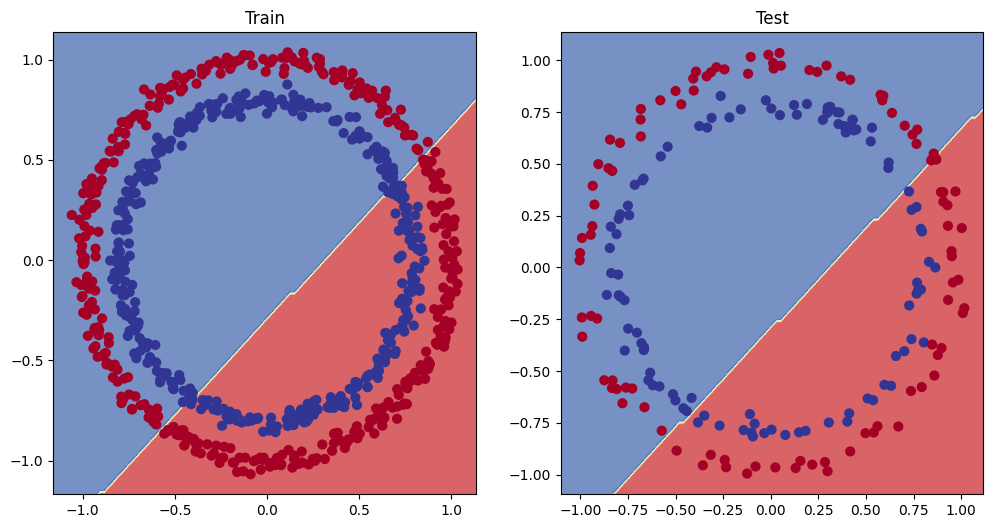

In [ ]:
# Plot the decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) # subplot() function you can draw multiple plots in one figure (rows, column, current plot)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2) #  (rows, column, current plot)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

### Improving a model (from a model perspective)

- Adding more layers - give the model more chances to learn about patterns in data

- Add more hidden units - go from 5 units to 10 units

- fit for longer (increase the number of epochs)

- Changing the activations functions

- Change the learing rate

- Change the loss function

These options are all from a model's perspective because they deal with the model, rather than the data (increasing data or decreasing data)


In [ ]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# Create a loss function

loss_fn_V1 = nn.BCEWithLogitsLoss()

# Create a optimizer

optimizer_V1 = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [ ]:
# Creating a training and evaluation loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the number of epochs
epochs = 1000

# Put the data to the target device
X_train, y_train = X_train.to(device) ,y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Trainng and Evaluation loop
for epoch in range(epochs):
    ### 1. Train
    model_1.train()

    ### 2. Forward Pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    ### 3. Loss fn /  accuracy

    loss = loss_fn(y_logits,
                y_train)

    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    ### Optimizer zero grad
    optimizer_V1.zero_grad()

    ### Loss backward (Backpropogation)
    loss.backward()

    ### Optimizer step (gradient descent)
    optimizer.step()


    ## Testing
    model_1.eval()
    with torch.inference_mode():
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))


    ### Loss for tesing
    test_loss = loss_fn(test_logits,
                        y_test)  # (predicted_value, actual_value)

    ### Accuracy for testing
    test_acc = accuracy_fn(y_true=y_test, # (actual_value, predicted value)
                           y_pred=test_pred)

    # Let's see what happenin'
    if epoch % 100 == 0:
        print(f"Epochs: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}")

Epochs: 0 | Loss: 0.69396, Acc: 50.88 | Test loss: 0.69261, Test acc: 51.00
Epochs: 100 | Loss: 0.69396, Acc: 50.88 | Test loss: 0.69261, Test acc: 51.00
Epochs: 200 | Loss: 0.69396, Acc: 50.88 | Test loss: 0.69261, Test acc: 51.00
Epochs: 300 | Loss: 0.69396, Acc: 50.88 | Test loss: 0.69261, Test acc: 51.00
Epochs: 400 | Loss: 0.69396, Acc: 50.88 | Test loss: 0.69261, Test acc: 51.00
Epochs: 500 | Loss: 0.69396, Acc: 50.88 | Test loss: 0.69261, Test acc: 51.00
Epochs: 600 | Loss: 0.69396, Acc: 50.88 | Test loss: 0.69261, Test acc: 51.00
Epochs: 700 | Loss: 0.69396, Acc: 50.88 | Test loss: 0.69261, Test acc: 51.00
Epochs: 800 | Loss: 0.69396, Acc: 50.88 | Test loss: 0.69261, Test acc: 51.00
Epochs: 900 | Loss: 0.69396, Acc: 50.88 | Test loss: 0.69261, Test acc: 51.00


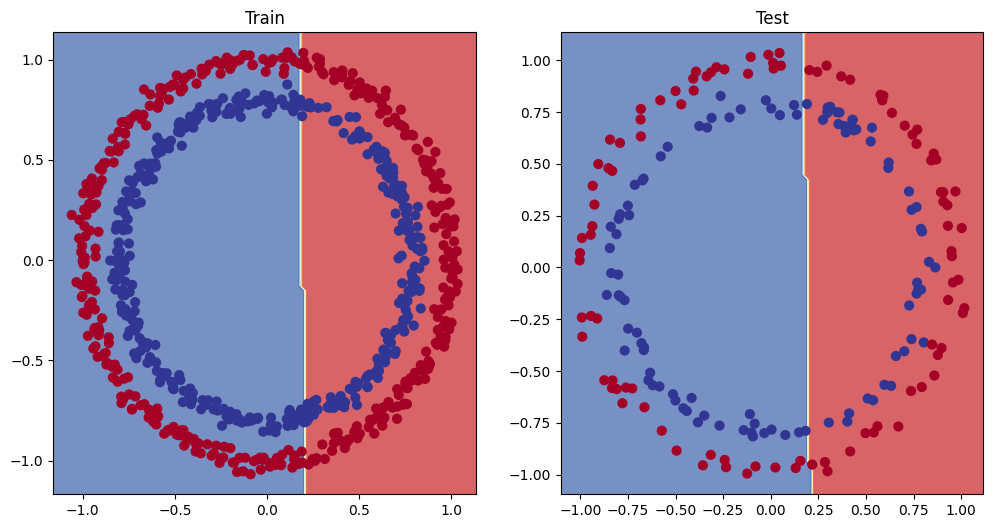

In [ ]:
# Plot the decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) # subplot() function you can draw multiple plots in one figure (rows, column, current plot)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2) #  (rows, column, current plot)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

## 5.1 Preparing data to see if our model can fit a straight line

One way to troubleshoot to a larger problem is to test out a smaller problem

In [ ]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias     # linear regression formula (without epsilon)

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
# Create train and test split
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lenght of each
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

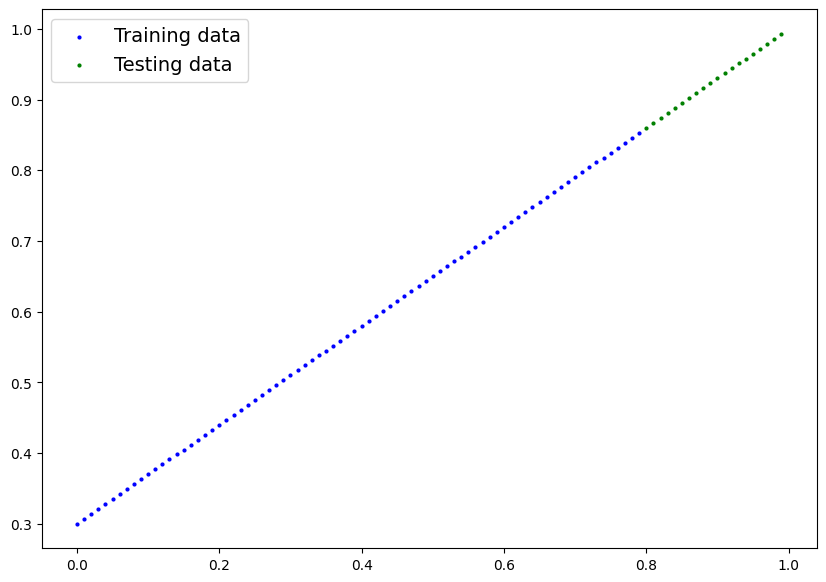

In [ ]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

## 5.2 Adjusting `model_1` to fit a straight line

In [ ]:
# Same architecture as model_1 (but using nn.Sequential())
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.001)

In [ ]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set number of epochs
epochs = 1000

# Put the data on target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression,  y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# Training
for epoch in range(epochs):
    y_pred = model_2(X_train_regression)
    loss = loss_fn(y_pred, y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Testing
    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test_regression)
        test_loss = loss_fn(test_pred, y_test_regression)

    # Print out what happenin'
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.75986 | Test loss: 0.94965
Epoch: 100 | Loss: 0.40272 | Test loss: 0.54029
Epoch: 200 | Loss: 0.05876 | Test loss: 0.13480
Epoch: 300 | Loss: 0.01461 | Test loss: 0.03342
Epoch: 400 | Loss: 0.00308 | Test loss: 0.00008
Epoch: 500 | Loss: 0.00309 | Test loss: 0.00012
Epoch: 600 | Loss: 0.00309 | Test loss: 0.00018
Epoch: 700 | Loss: 0.00299 | Test loss: 0.00011
Epoch: 800 | Loss: 0.00299 | Test loss: 0.00016
Epoch: 900 | Loss: 0.00289 | Test loss: 0.00011


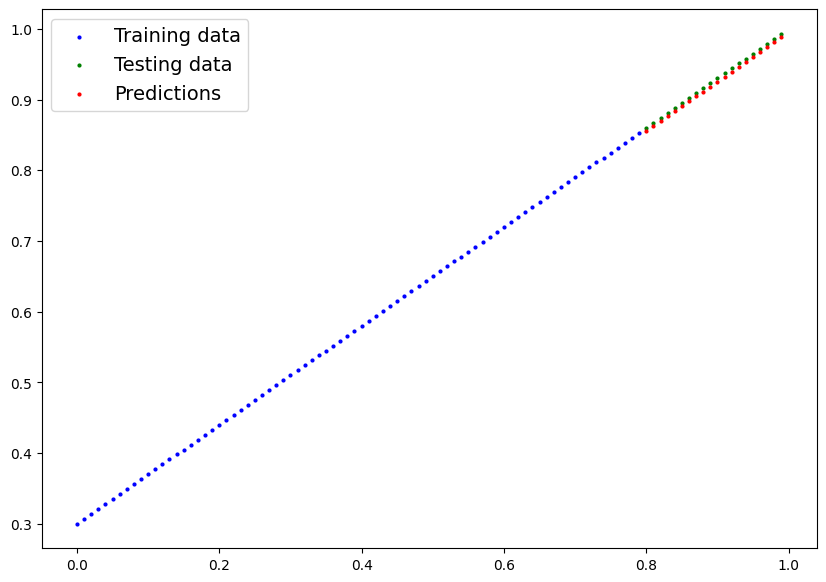

In [ ]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# Plot data and predictions
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu())

## 6.1 The missing piece: non-linearity

"What patterns could you draw if you are given a infinite amount of straight and non-straight lines?"

Or in machine learning terms, an infinite (but relly it is finite) of linear and non-linear functions?

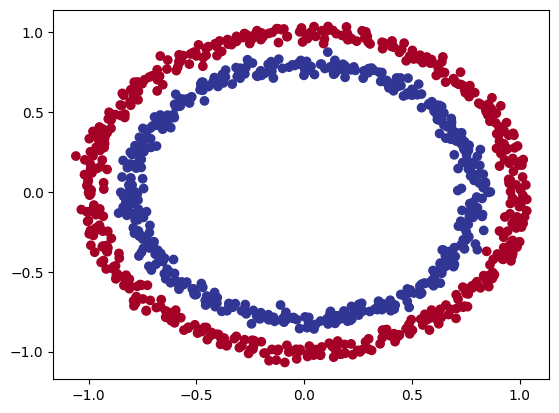

In [ ]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
# Convert the data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

### 6.2 Buildig a model with non-linearity

- Linear = straight line
- Non-linear = non-staright line

In [ ]:
# Build a model with non-linear activation functions
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# Loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.1)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the no of epochs
epochs = 1000

# setting the data to proper device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Training and a evaluation loop
for epoch in range(epochs):
    ## Train
    model_3.train()

    ### Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    ### loss/acc
    loss = loss_fn(y_logits,
                   y_train)

    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    ### optimizer zero_grad
    optimizer.zero_grad()

    ### loss backward
    loss.backward()

    ### optimizer step
    optimizer.step()


    ## Testing
    model_3.eval()

    ### Prediction
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

    ### Loss/acc

    test_loss = loss_fn(test_logits,
                        y_test)

    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)


    # Print out what's hapennin'
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")





Epoch: 0 | Loss: 0.69295, Acc: 50.00% | Test Loss: 0.69319, Test acc: 50.00%
Epoch: 100 | Loss: 0.69115, Acc: 52.88% | Test Loss: 0.69102, Test acc: 52.50%
Epoch: 200 | Loss: 0.68977, Acc: 53.37% | Test Loss: 0.68940, Test acc: 55.00%
Epoch: 300 | Loss: 0.68795, Acc: 53.00% | Test Loss: 0.68723, Test acc: 56.00%
Epoch: 400 | Loss: 0.68517, Acc: 52.75% | Test Loss: 0.68411, Test acc: 56.50%
Epoch: 500 | Loss: 0.68102, Acc: 52.75% | Test Loss: 0.67941, Test acc: 56.50%
Epoch: 600 | Loss: 0.67515, Acc: 54.50% | Test Loss: 0.67285, Test acc: 56.00%
Epoch: 700 | Loss: 0.66659, Acc: 58.38% | Test Loss: 0.66322, Test acc: 59.00%
Epoch: 800 | Loss: 0.65160, Acc: 64.00% | Test Loss: 0.64757, Test acc: 67.50%
Epoch: 900 | Loss: 0.62362, Acc: 74.00% | Test Loss: 0.62145, Test acc: 79.00%


In [ ]:
# Makes predictions
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

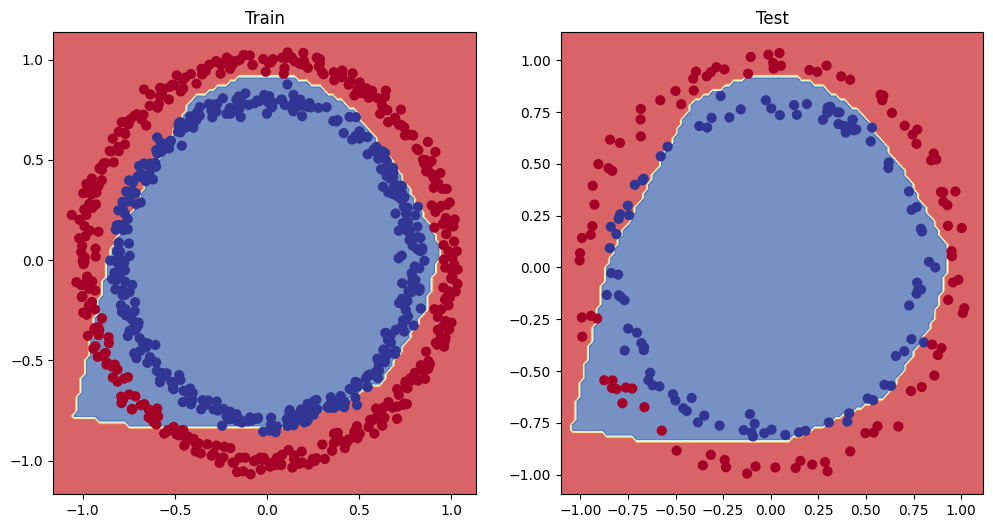

In [ ]:
# Plot the decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

 ## Replicating non-linear activation functions

 Neural networks, rather than us telling the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the pattersn on its own.

 And these tools are linear and non-linear functions.

In [ ]:
# Create a tensor
A = torch.arange(-10, 10, 1.0)
A.dtype

torch.float32

In [ ]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

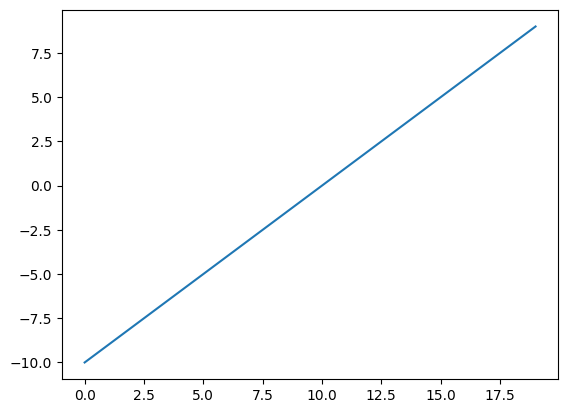

In [ ]:
# Visualize the data
plt.plot(A);

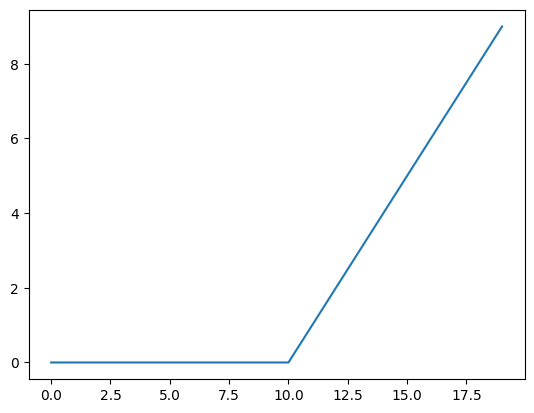

In [ ]:
 plt.plot(torch.relu(A));

In [ ]:
 def relu(x: torch.Tensor) -> torch.Tensor:
    return torch.maximum(torch.tensor(0), x) # inputs must be tensors

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

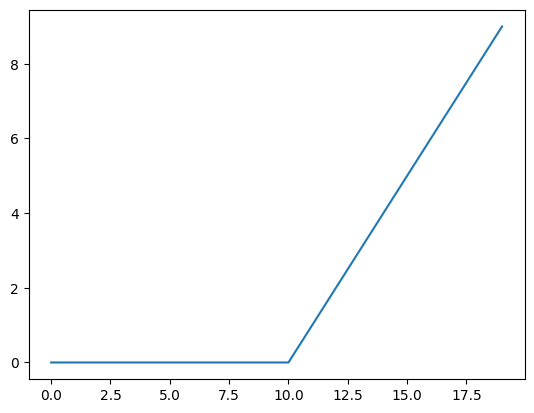

In [ ]:
# Plot the ReLU activation function
plt.plot(relu(A));

In [ ]:
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

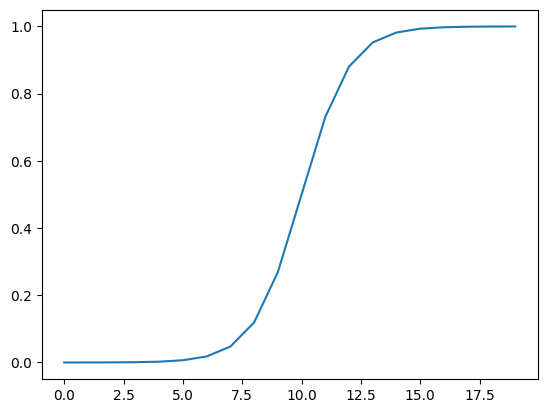

In [ ]:
plt.plot(torch.sigmoid(A));

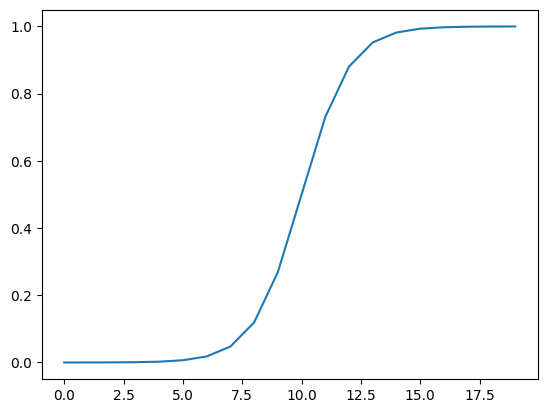

In [ ]:
plt.plot(sigmoid(A));

## 8. Putting it all together with a multi-class classification problem

- Binary classification - one thing or another(cat vs dog, spam vs not spam, fraud or not fraud)
- Multi-class classification  - more than one thing or another (cat vs dog vs chicken)

### 8.1 Create a toy multi-class dataset

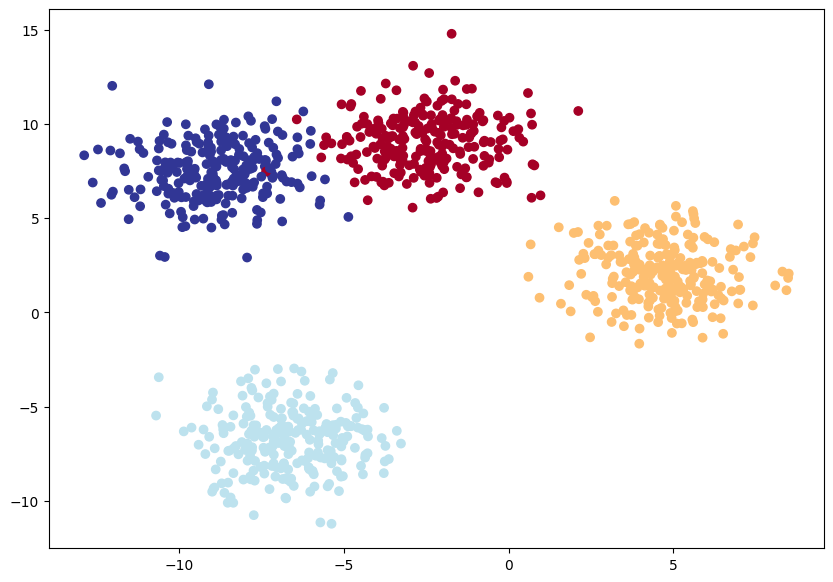

In [ ]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create a multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5, #give the clusters a little shake up
                            random_state=RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)


# 4. Plot data (visualize, visualize, visualize)
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu); # c  - array or list

### 8.2  Create device agnositic code

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
# Build a multi-class classification model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """ Inititalizes multi-class classification model.

        Args:
            input_features (int) : Number of input features to the model
            output_features (int) : Number of output features (number of output classes)
            hidden_units (int) : Number of hidden units between layers, default 8

        Returns:

        Example:

        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            # nn.ReLU()
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            # nn.ReLU()
            nn.Linear(in_features=hidden_units, out_features=output_features),
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
# shape
X_blob_train.shape, y_blob_train[:5]

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0]))

In [ ]:
# To check the number of classes
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

### 8.3 Create a loss function and an optimizer for multi-class classification model

In [ ]:
# Setup loss function for multiclass classification - predicted value - actual value
loss_fn = nn.CrossEntropyLoss()

# Setup optimizer for multiclass classification - optimizers updates our model parameters to try and reduce the loss
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)

### 8.4 Getting prediction probabilities for a multi-class PyTorch model

In order to evaluate and train and test our model, we need to convert our model's outputs (logits) to prediction probabilities and then to prediction labels.

Logits (raw output of the model) -> Pred probs (use `torch.softmax`) -> Pred labels (take the argmax of the prediction probabilites)

In [ ]:
# Let;s get some raw outputs of our model (logits)
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test.to(device))

y_logits[:10]

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852],
        [ 2.0878, -1.3728,  2.1248,  2.5052],
        [ 1.8310,  0.8851,  2.1674,  0.6006],
        [ 0.1412, -1.4742, -0.0360,  1.0373],
        [ 2.9426,  0.7047,  3.3670,  1.6184],
        [-0.0645, -1.5006, -0.2666,  0.8940]])

In [ ]:
# Convert our model's logit output to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]])
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]])


In [ ]:
# Convert our model's predcition probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2,
        2, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 2, 1, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3,
        3, 3, 1, 3, 3, 1, 3, 2, 3, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 3, 2, 2, 3, 3, 3, 1, 2,
        2, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 2, 2,
        2, 2, 3, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3,
        2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3,
        1, 3, 2, 3, 3, 1, 2, 3])

In [ ]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

### 8.5 Creating a training loop and testing loop for a multi-class PyTorch model

In [ ]:
torch.cuda.manual_seed(42)
torch.manual_seed(42)

# Put the data to the target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# Number of epochs
epochs = 100

# Training and evaluation loop
for epoch in range(epochs):

    ## Training

    model_4.train()

    # forward pass
    y_logits = model_4(X_blob_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
    # loss/acc
    loss = loss_fn(y_logits, y_blob_train)

    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # optimizer zero grad
    optimizer.zero_grad()

    # Loss backward (Backpropogation)
    loss.backward()

    # optimizer step (gradient descent)
    optimizer.step()


    ## Testing
    model_4.eval()

    with torch.inference_mode():
        test_logits = model_4(X_blob_test)
        test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

    # loss/acc
    test_loss = loss_fn(test_logits,
                        y_blob_test)

    test_acc = accuracy_fn(y_true=y_blob_test,
                       y_pred=test_pred)

    # Print what's hapennin'
    if epoch % 10 == 0:
        print(f"Epochs: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.2f}")

Epochs: 0 | Loss: 1.0432, Acc: 65.50 | Test loss: 0.5786, Test acc: 95.50
Epochs: 10 | Loss: 0.1440, Acc: 99.12 | Test loss: 0.1304, Test acc: 99.00
Epochs: 20 | Loss: 0.0806, Acc: 99.12 | Test loss: 0.0722, Test acc: 99.50
Epochs: 30 | Loss: 0.0592, Acc: 99.12 | Test loss: 0.0513, Test acc: 99.50
Epochs: 40 | Loss: 0.0489, Acc: 99.00 | Test loss: 0.0410, Test acc: 99.50
Epochs: 50 | Loss: 0.0429, Acc: 99.00 | Test loss: 0.0349, Test acc: 99.50
Epochs: 60 | Loss: 0.0391, Acc: 99.00 | Test loss: 0.0308, Test acc: 99.50
Epochs: 70 | Loss: 0.0364, Acc: 99.00 | Test loss: 0.0280, Test acc: 99.50
Epochs: 80 | Loss: 0.0345, Acc: 99.00 | Test loss: 0.0259, Test acc: 99.50
Epochs: 90 | Loss: 0.0330, Acc: 99.12 | Test loss: 0.0242, Test acc: 99.50


### 8.6 Making and evaluating predcitions with a PyTorch multi-class model

In [ ]:
# Make predicitons
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test.to(device))

y_logits[:10]

tensor([[  4.3377,  10.3539, -14.8948,  -9.7642],
        [  5.0142, -12.0371,   3.3860,  10.6699],
        [ -5.5885, -13.3448,  20.9894,  12.7711],
        [  1.8400,   7.5599,  -8.6016,  -6.9942],
        [  8.0727,   3.2906, -14.5998,  -3.6186],
        [  5.5844, -14.9521,   5.0168,  13.2891],
        [ -5.9739, -10.1913,  18.8655,   9.9179],
        [  7.0755,  -0.7601,  -9.5531,   0.1736],
        [ -5.5918, -18.5990,  25.5310,  17.5799],
        [  7.3142,   0.7197, -11.2017,  -1.2011]])

In [ ]:
# Go from logits -> Prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[2.4332e-03, 9.9757e-01, 1.0804e-11, 1.8271e-09],
        [3.4828e-03, 1.3697e-10, 6.8363e-04, 9.9583e-01],
        [2.8657e-12, 1.2266e-15, 9.9973e-01, 2.6959e-04],
        [3.2692e-03, 9.9673e-01, 9.5435e-08, 4.7619e-07],
        [9.9168e-01, 8.3089e-03, 1.4120e-10, 8.2969e-06],
        [4.5039e-04, 5.4287e-13, 2.5532e-04, 9.9929e-01],
        [1.6306e-11, 2.4030e-13, 9.9987e-01, 1.3003e-04],
        [9.9860e-01, 3.9485e-04, 5.9937e-08, 1.0045e-03],
        [3.0436e-14, 6.8303e-20, 9.9965e-01, 3.5218e-04],
        [9.9843e-01, 1.3657e-03, 9.0767e-09, 2.0006e-04]])

In [ ]:
# Go from Prediction Probabilities -> Prediction Labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

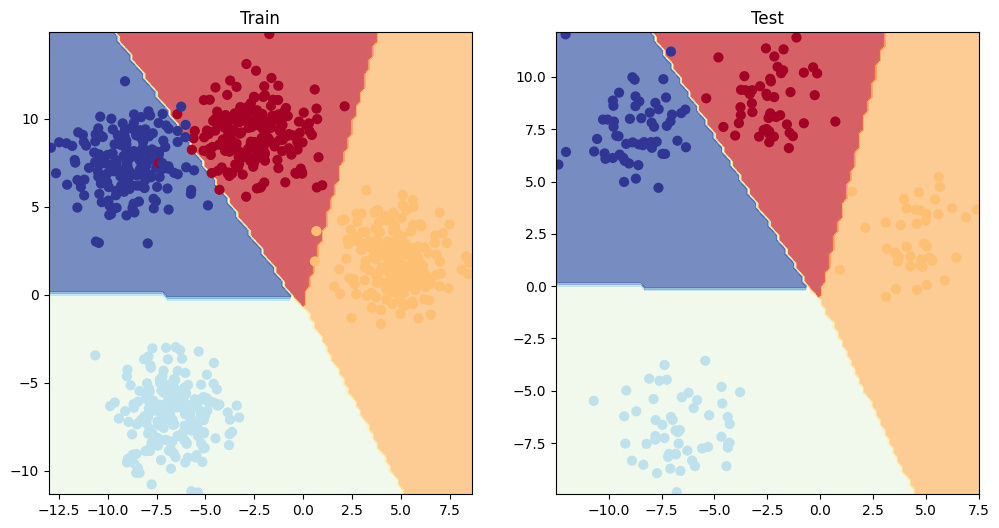

In [ ]:
# Plot the decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## 9. A few more classification metrics... (to evaluate our classification model)

- Accuracy - out of 100 samples, how many does our model get right?
- Precision
- Recall
- F1-score
- Confusion matrix
- Classification report

In [ ]:
!pip install torchmetrics

In [ ]:
from torchmetrics import Accuracy

# Setup metrics
torchmetrics_accuracy = Accuracy(task="multiclass", num_classes=4).to(device)

# Calculate accuracy
torchmetrics_accuracy(y_preds, y_blob_test)

tensor(0.9950)